<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW4/problem1_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
#Import library
library(readr)
library(stringr)


In [87]:
df <- read_csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW4/adult_training.csv")
head(df)

Rows: 14797 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): workclass, marital_status, occupation, sex, income
dbl (4): age, education, capital_gain, capital_loss

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
40,Private,11,Married-civ-spouse,Craft-repair,Male,0,0,>50K


In [88]:
colnames(df)

[1] "age"            "workclass"      "education"      "marital_status"
[5] "occupation"     "sex"            "capital_gain"   "capital_loss"  
[9] "income"

In [89]:
# replacing ? with most comon values
df$workclass = str_replace(df$workclass,"\\?","Private")
df$occupation = str_replace(df$occupation,"\\?","Prof-specialty")

In [90]:
sum(is.na(df))

[1] 0

In [91]:
summary(df)

      age         workclass           education     marital_status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital_gain    capital_loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

# 2. Create a contingency table of workclass and sex, and plot it.

In [92]:
df_ct1 <- table(df$sex,df$workclass)
df_ct1

        
         Federal-gov Local-gov Never-worked Private Self-emp-inc
  Female         149       377            1    3951           54
  Male           305       592            4    7159          444
        
         Self-emp-not-inc State-gov Without-pay
  Female              178       201           1
  Male                992       385           4

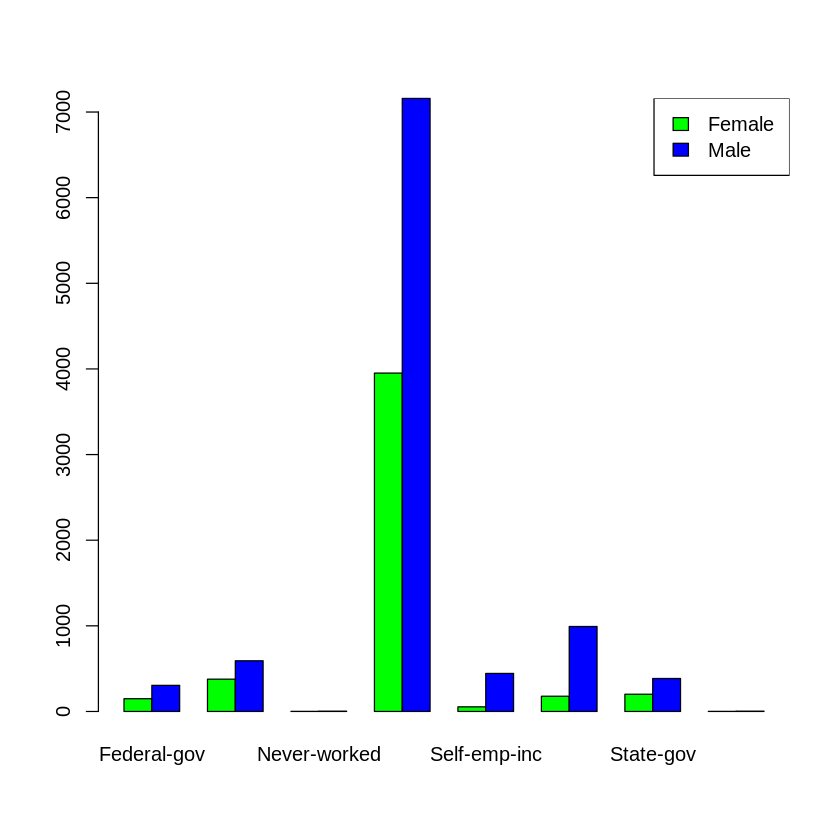

In [93]:
colors <- c("green", "blue")
barplot(df_ct1, col = colors, beside = TRUE)
legend("topright", legend = c("Female", "Male"), fill = colors)

In [94]:
df_ct2 <- table(df$sex,df$marital_status)
df_ct2

        
         Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent
  Female     1219                 7                761                    95
  Male        795                 4               6010                   104
        
         Never-married Separated Widowed
  Female          2160       290     380
  Male            2717       182      73

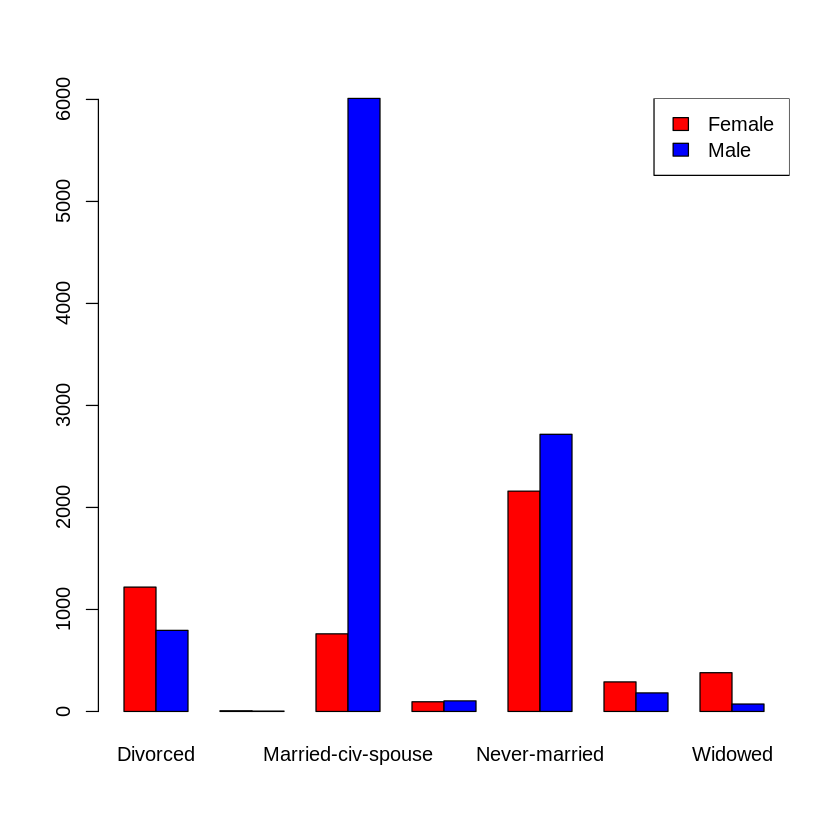

In [95]:
colors <- c("red", "blue")
barplot(df_ct2, col = colors, beside = TRUE)
legend("topright", legend = c("Female", "Male"), fill = colors)

In [98]:
df_adultOver40<- subset(df,age>40)
head(df_adultOver40,10)

age,workclass,education,marital_status,occupation,sex,capital_gain,capital_loss,income
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
54,Private,10,Married-civ-spouse,Prof-specialty,Male,0,0,>50K
44,Private,14,Divorced,Exec-managerial,Female,0,0,<=50K
50,Federal-gov,13,Divorced,Exec-managerial,Male,0,0,>50K
47,Self-emp-inc,9,Divorced,Exec-managerial,Male,0,0,<=50K
43,Private,10,Married-civ-spouse,Tech-support,Male,0,0,>50K


In [99]:
df_ct3 <- table(df$sex,df$marital_status)
df_ct3

        
         Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent
  Female     1219                 7                761                    95
  Male        795                 4               6010                   104
        
         Never-married Separated Widowed
  Female          2160       290     380
  Male            2717       182      73

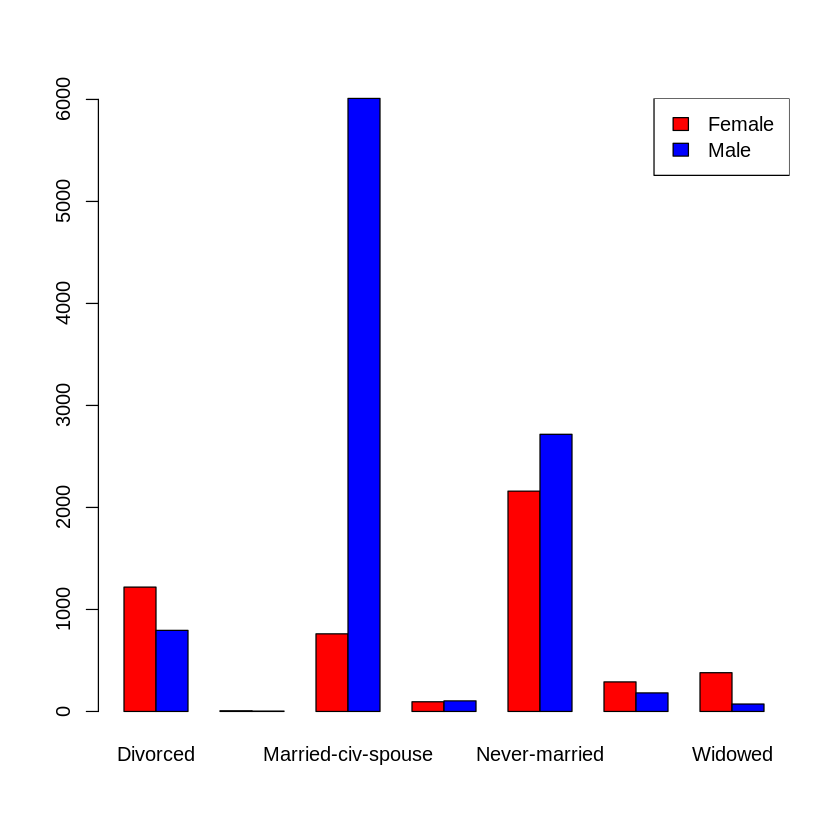

In [100]:
colors <- c("red", "blue")
barplot(df_ct3, col = colors, beside = TRUE)
legend("topright", legend = c("Female", "Male"), fill = colors)

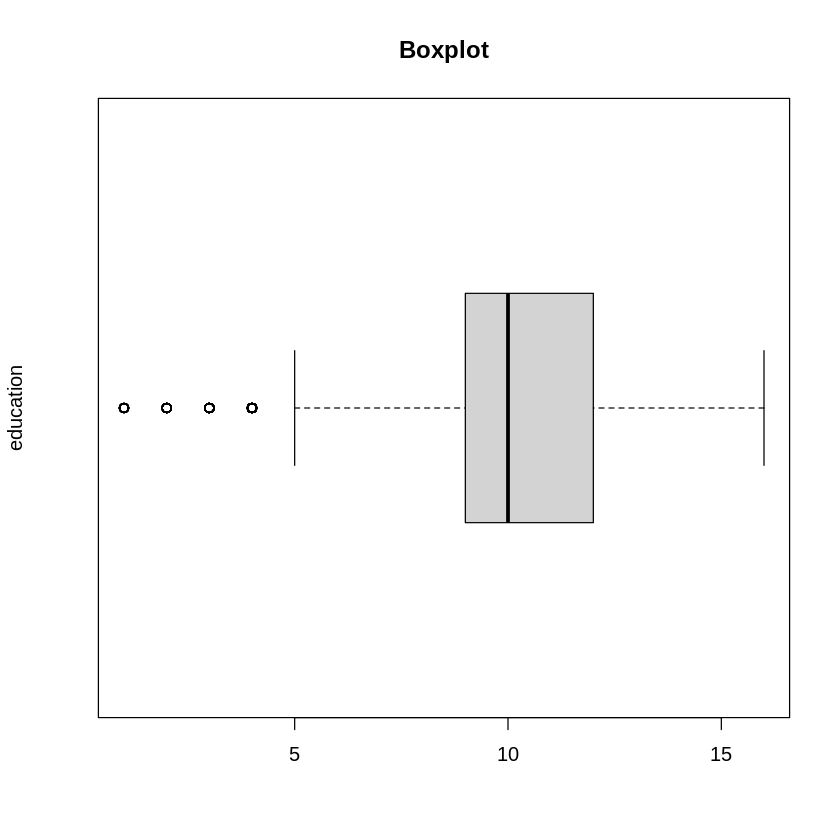

In [102]:
boxplot(df$education,ylab = "education",main = "Boxplot",horizontal = TRUE)

In [104]:
three_sigma_rule <- (df$education < -3 | df$education > 3 )
# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")
cat("The scaled education values that are outliers: \n\n")
df$education[which(three_sigma_rule)]
cat("\n\nThe scaled education values that are NOT outliers: \n\n")
df$education[which(!three_sigma_rule)]

There are 14528 outliers 

The scaled education values that are outliers: 



[1] 13  9  5  9 14 11  7  7 10  9 10 10  9 10  5 13 14 10  9 13  9 10 11 13
   [25] 10 10  9 10 13 10 10 12  7 13  9  9  9 16  9 14 13 14  6  7  9  9  9  5
   [49] 10 11  9 13 13 13 10 10 12 12  9 13 14 11 10  9 10 10 11  9  9 13  9 10
   [73] 10 14  7 11  9 10 13  9  9  9 10 10 13 13 10 14  9 13  7 13  9 10  9  4
   [97] 13 13  9  9  9  9 11 15  9 10 13 14  9 13 12 10  9 10  9  9 13  9 10  9
  [121]  9 14  9  9 10  9 10 13  9 13 10 13  9 13 14 13  9  9 14 10 10  9  9 10
  [145]  9  7 14  9 11 10  9  9 10 13  9 14  9 12  9  9 13  7 11 12 13 13 13 13
  [169] 14 13 13  9 10 12 13 11 10  9 10 10 10 10  9 13 13  9  9 13 13 10 11 14
  [193]  9 10 10  9 16 10  7  9 14  9 13 10 10  9  9  9  9 12 10  9 13 13  9 10
  [217] 14  9 11 10 13  9 13  9  9  9 10  9  9 13 13 10 13 10 14  7  9  9 15  6
  [241]  9 10  7  9  9  7 10  4 14  9  7 16 13 10  9 13 10  9 13  9 10 10  9 14
  [265]  9  9  6  9  9 13  9 13 11  5  9  9 13 13  9 10  9  9  9 10  9 16  9  5
  [289]  4 10 14 10  5  7 13  9 10  7  9  4 13 14 10 10 14 14 13  9 13 13 10 16
  [313] 10 13 11  9 10 13  9 13 13  9 10  9  7 10 11 11 10 10 10  9 10 14  8 13
  [337] 13  6  9  9  9  9  9 16 10 10 10  9 11  9 10 13 10 11 10 10  9 11  9 10
  [361]  9 14 13 12  7  9  7 14 13 10  6  9 11 10  9 14 11  9  9 10  7 10  9  7
  [385]  9  9 13  7 10 13  9  9  9 14 11  9 16  9 13  7  9  7 10 10  6 10 14 13
  [409]  9  5 13 13 10 11 13 13 15  4  9 12  9 10  6  9 14 10 10  9  9 14  9 10
  [433]  7  9 14 15 13  9  9 10 10 13 10 10  6  9  9 10  9 13  9 10 14  9  9 11
  [457]  9  9 10 13 11  9 14 13 10 10 13 13  9 11  9 10  4  9  9  9 10  9  9 11
  [481] 12  9  9  7  9 13 10 10 13 13 10 10 13 14  9  9 12 10 12 13  9 13  9 11
  [505] 13  9 10 12 13 16 10 13  6  9 13 13  9 13 14 13 13  9 13 13 10  9 10 13
  [529] 10  9  9 10  9 10  9  9  9  9  9 14 11 12 13 15  7 11 10 11 13  9  9 14
  [553]  9 10  9 13 12 14  9 13 13 10 13 10 16  9 15 10 14  9 13 10  9  9 13 14
  [577] 10  9  9 13 10  9  9 13 13  9 12 10 13  9  9 10 12  9  9 10 15  9  9 13
  [601]  9 10  9  9  9  7 11 13 13 10 15 14 10  9 13  7 10 13  6 13  9 11  9 14
  [625]  9 13 13 13  9 10  9  4  6 14  9  9  7  9  9 10  6 10  9 13 12  7  9  9
  [649] 10 10  6  9  9 11  9 10 10  6 14  9  9  6  9 14 15 13 14 10  9 11 10  9
  [673]  9  9 13  9  9 14 10  9  9  9 10 14  9 10 10 11 13 13 13  5  5 10 10  9
  [697]  9  6 14  6 10 12  9  6 10  9 10 16 13  8 13  4 10 10  7 13 10  6  9 10
  [721] 13  9  9 10 10  9  9 13 10  9  7  7  9  6 13  9 15  9  9 12 13  9  9 13
  [745] 15  9 10 13  6  9  9  9  4  9  9 15 12 10  9 10 10  9  9  9  9  9  9  9
  [769]  9 10 10  9 10  9  9  4  9 10  8 13 10 13  9 10  9 10  9  9 11 13  9  9
  [793]  7  9  9 10  9 13  6  9 10 11  6  7 13 13 12 13 14 14  5 10  9 12 13  9
  [817]  9  9 11  9  9  9  9  4 10  9  9 10  9 10 13 11  4  9 10  9 14  5 13  9
  [841] 13 12 10  9 13 10  5  9 10 10  9  9 10  9 14 13  7  9  9  9 14 14  6  5
  [865]  7  9 10 13 10 10 13  9  9 13 13  9  9  7 14  9 14  9 13  6  9  9 13 10
  [889] 14 13  9 10  7  9 13  7  6  9  9 10  9 10 12 10 10  9 13  9  9 13  9 13
  [913] 14  9 12 16 13 11 12 10  7  9 10 10 13  4 13  6 10 13 13  7 10  9  4 11
  [937] 13  9 13  7 10  9 10 10 13 10  9  9 14 12 13  9 10 10  8  9 10 10  9 16
  [961]  9 10  9  7 14  9 11  9 10 10  9 13  9 10 14  9 13 10  7 10 14  6 10 13
  [985]  9 10 13 13 11  6  9 10 12 12 14 13 10  7  8  5 13 13 13 12 13  9  9  9
 [1009]  9  9 10  9  7 13  9 13 12  4 13 13  9 11 13 10 10 15 12 10 10 14 16 10
 [1033]  9 13 13  9 11  8  9  9 11  9 15 10  9 13 14  9  7 11 13  9 10 10 10  4
 [1057] 10 13 13 14 10 14  7 10  7  6  9 13 13 13 12  9  7 11 14  9  5 13  5 10
 [1081] 16 10 10  9  4 13 13  9 10 10  4 10 11  9 10 10  5  9  8 13 15  9  9 15
 [1105] 13 13 10 14 10 10  6 13  9  9 10 12 11  9  9 14 13 11  7 10 13  7  9 10
 [1129]  9  9 10 10 13 10 13  9  9 12  9 13 10 14 11  4 13 13 14 10  9 10 10 10
 [1153]  9 10  9 11  9  9 10  9 14  9 10  7 13  9  6 13  7 13  9 10 14  9  6  6
 [1177] 13  9  9 13 11  9 14  9  6  9  9  7 10 13 14 11 13  9 10  4 10 13 13  9
 [12



The scaled education values that are NOT outliers: 



[1] 2 1 2 3 2 3 3 2 2 3 3 2 3 3 2 3 3 2 3 2 3 1 1 3 3 2 3 3 1 3 3 2 1 2 3 3 3
 [38] 3 3 2 3 3 3 3 2 2 2 2 3 1 1 2 2 1 1 1 3 2 2 1 3 2 3 3 2 3 3 3 3 3 3 3 3 2
 [75] 3 3 3 3 3 3 3 3 3 1 2 3 3 3 1 2 3 3 2 3 3 2 3 2 2 3 2 3 3 3 2 2 2 3 3 3 3
[112] 2 2 3 3 2 3 2 3 2 2 3 3 3 3 2 2 2 2 3 2 1 3 2 3 3 2 3 3 3 3 3 3 2 3 3 3 3
[149] 2 2 3 2 2 2 2 3 3 2 3 3 3 3 3 2 3 3 3 1 3 2 1 3 1 3 3 3 1 3 3 2 3 3 3 3 3
[186] 3 3 3 3 3 1 2 1 1 3 1 3 3 3 2 3 1 3 2 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 2 3 3
[223] 2 2 2 2 3 3 3 2 3 2 3 3 3 3 2 3 2 2 2 3 2 2 2 2 3 3 3 3 3 3 2 2 2 3 2 2 2
[260] 3 2 2 3 2 1 3 3 2 3

In [106]:
df_aducltAbove80<- subset(df,age>80)

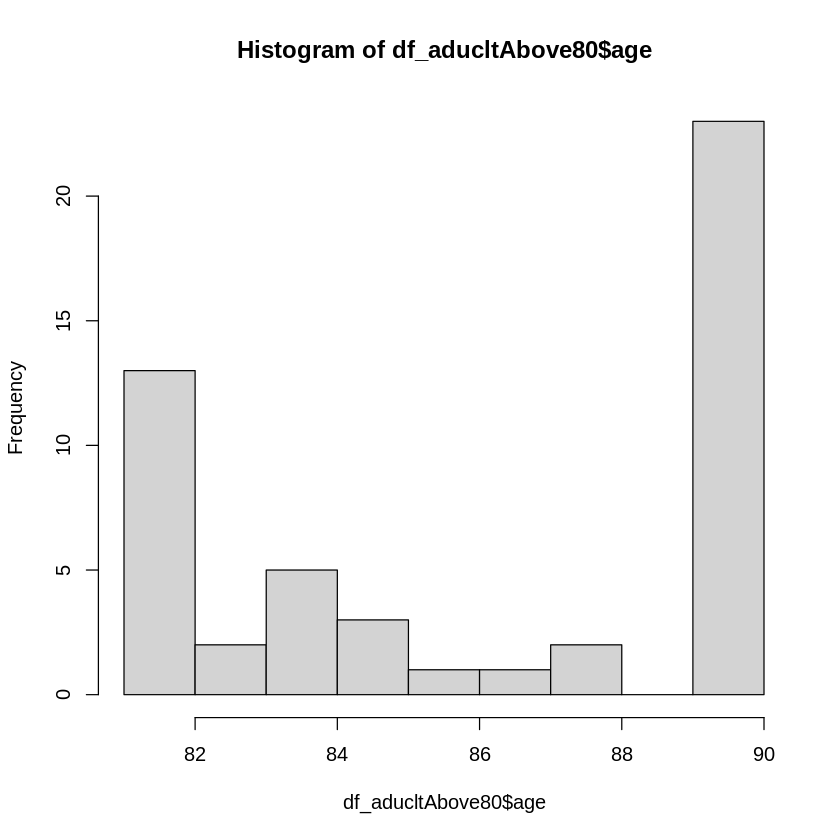

In [107]:
#Plotting histogram for Age
hist(df_aducltAbove80$age)